In [2]:
# import libraries 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split


In [3]:
# import dataset 
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Path to dataset files:", path)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/davidecosta/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2


In [4]:
import shutil

# Define the paths to the two folders
folder1 = os.path.join(path, 'HAM10000_images_part_1')
folder2 = os.path.join(path, 'HAM10000_images_part_2')
merged_folder = os.path.join(path, 'HAM10000_images_merged')

# Create the merged folder if it doesn't exist
if not os.path.exists(merged_folder):
    os.makedirs(merged_folder)

# Move all images from folder1 to merged_folder
for filename in os.listdir(folder1):
    shutil.move(os.path.join(folder1, filename), os.path.join(merged_folder, filename))

# Move all images from folder2 to merged_folder
for filename in os.listdir(folder2):
    shutil.move(os.path.join(folder2, filename), os.path.join(merged_folder, filename))

print("Images have been merged into:", merged_folder)

Images have been merged into: /Users/davidecosta/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2/HAM10000_images_merged


Number of images in the merged folder: 10015
No duplicate images found.


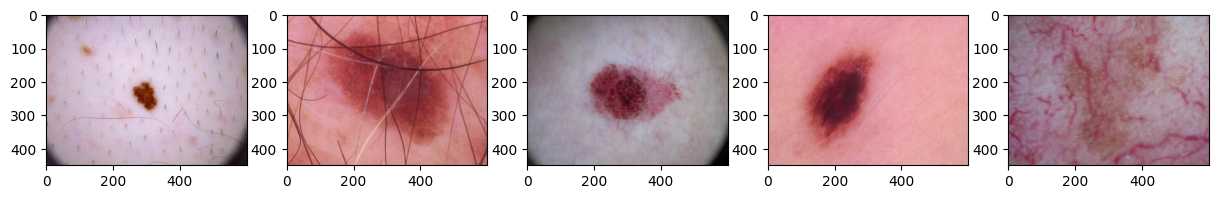

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter

# Define the path to the merged folder
merged_folder = os.path.join(path, 'HAM10000_images_merged')

# Count the number of images in the merged folder
image_files = [f for f in os.listdir(merged_folder) if os.path.isfile(os.path.join(merged_folder, f))]
print(f"Number of images in the merged folder: {len(image_files)}")

# Check for duplicate images
image_counts = Counter(image_files)
duplicates = [item for item, count in image_counts.items() if count > 1]
if duplicates:
    print(f"Found {len(duplicates)} duplicate images.")
else:
    print("No duplicate images found.")

# Display sample images
num_samples = 5
sample_images = image_files[:num_samples]
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for ax, img_file in zip(axes, sample_images):
    img_path = os.path.join(merged_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)

First saves random photo into the folder code uploads of team_44

In [6]:
import random
import shutil

# Select a random image from the test dataset
random_image_path = random.choice(df['path'].tolist())

# Define the destination path for the downloaded image
destination_path = os.path.join(os.getcwd(), os.path.basename(random_image_path))

# Copy the random image to the destination path
shutil.copy(random_image_path, destination_path)

print(f"Random image downloaded to: {destination_path}")

NameError: name 'df' is not defined

Save photo into computer folder adding your destination path

In [27]:
# Select a random image from the test dataset
random_image_path = random.choice(df['path'].tolist())

# Define the destination path for the downloaded image
destination_path = os.path.join('C:\\Users\\giamb\\OneDrive\\Documents', os.path.basename(random_image_path))

# Copy the random image to the destination path
shutil.copy(random_image_path, destination_path)

print(f"Random image downloaded to: {destination_path}")

Random image downloaded to: C:\Users\giamb\OneDrive\Documents\ISIC_0027343.jpg


This is to check if it's in fact correct when photo is in the folder uploads of team_44

In [25]:
# Get the classification for the selected image
selected_class = df.loc[df['path'] == random_image_path, 'cell_type'].values[0]
print("The classification for the selected image is:", selected_class)

The classification for the selected image is: Melanocytic nevi


This is to check if it's in fact correct if photo is in your computer folder

In [21]:
destination_path = os.path.join('C:\\Users\\giamb\\OneDrive\\Documents', '\\ISIC_0030893.jpg')

# Extract the file name from the destination path
destination_filename = os.path.basename(destination_path)

# Look up the classification by matching the file name portion in df['path']
selected_class = df.loc[df['path'].apply(lambda x: os.path.basename(x)) == destination_filename, 'cell_type'].values[0]
print("The classification for the selected image is:", selected_class)
# Verify if the classification matches the true mole name in the dataset
true_class = df.loc[df['path'].apply(lambda x: os.path.basename(x)) == destination_filename, 'cell_type'].values[0]

if selected_class == true_class:
    print("The classification matches the true mole name in the dataset.")
else:
    print("The classification does not match the true mole name in the dataset.")


The classification for the selected image is: Basal cell carcinoma
The classification matches the true mole name in the dataset.


In [6]:
import pandas as pd
import os
from PIL import Image

# Define the path to the base folder where all images are placed
base_skin_dir = os.path.join(path, 'HAM10000_images_merged')

# Read the CSV file containing the metadata
metadata_path = os.path.join(path, 'HAM10000_metadata.csv')
df = pd.read_csv(metadata_path)

# Create the 'path' column by joining the base folder path with the image_id
df['path'] = df['image_id'].map(lambda x: os.path.join(base_skin_dir, f'{x}.jpg'))

# Create the 'cell_type' column with the short name of the lesion type
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df['cell_type'] = df['dx'].map(lesion_type_dict.get)

# Create the 'cell_type_idx' column by categorizing the lesion type into codes from 0 to 6
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

# Display the first few rows of the dataframe to verify the changes
print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  /Users/davidecosta/.cache/kagglehub/datasets/k...   
1  /Users/davidecosta/.cache/kagglehub/datasets/k...   
2  /Users/davidecosta/.cache/kagglehub/datasets/k...   
3  /Users/davidecosta/.cache/kagglehub/datasets/k...   
4  /Users/davidecosta/.cache/kagglehub/datasets/k...   

                       cell_type  cell_type_idx  \
0  Benign keratosis-like lesions              2   
1  Benign keratosis-like lesions              2   
2  Benign keratosis-like lesions              2   
3  Benign keratosis-like lesions      

EXPLORATORY DATA ANALYSIS 

cell_type
Melanocytic nevi                 6705
Melanoma                         1113
Benign keratosis-like lesions    1099
Basal cell carcinoma              514
Actinic keratoses                 327
Vascular lesions                  142
Dermatofibroma                    115
Name: count, dtype: int64


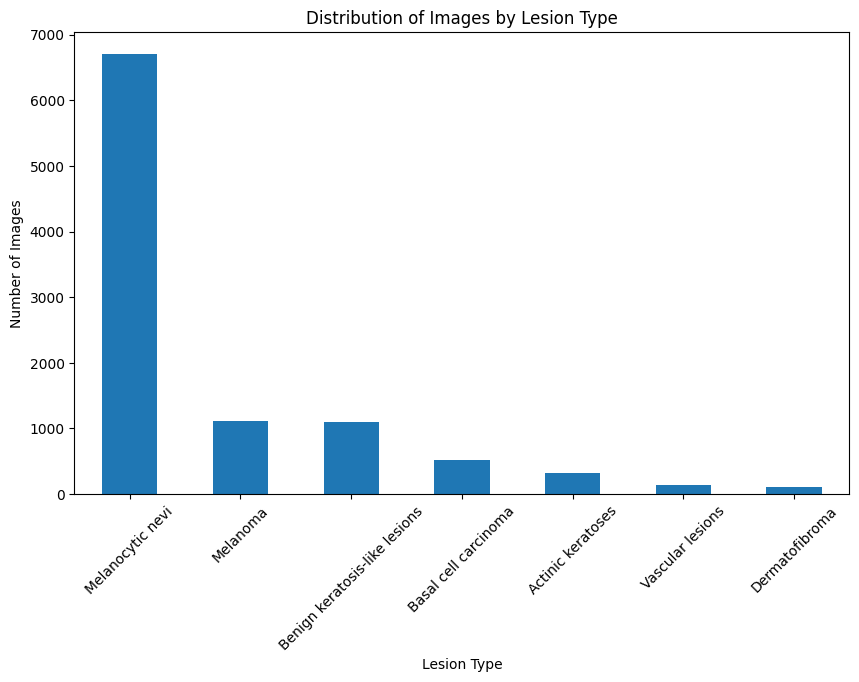

In [9]:
category_counts = df['cell_type'].value_counts()
print(category_counts)

# Plot the distribution of images for each category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Images by Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='dx_type'>

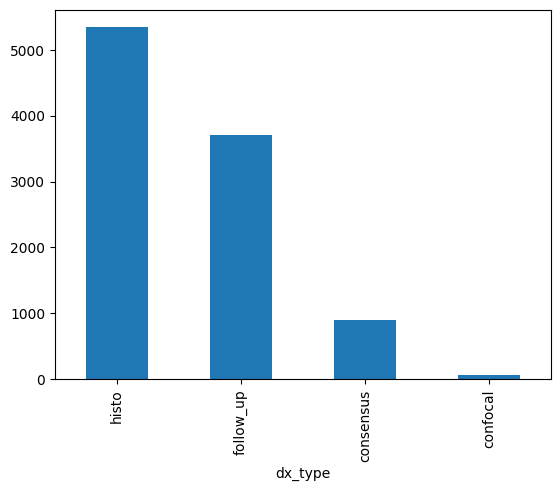

In [10]:
df['dx_type'].value_counts().plot(kind='bar')

<Axes: xlabel='localization'>

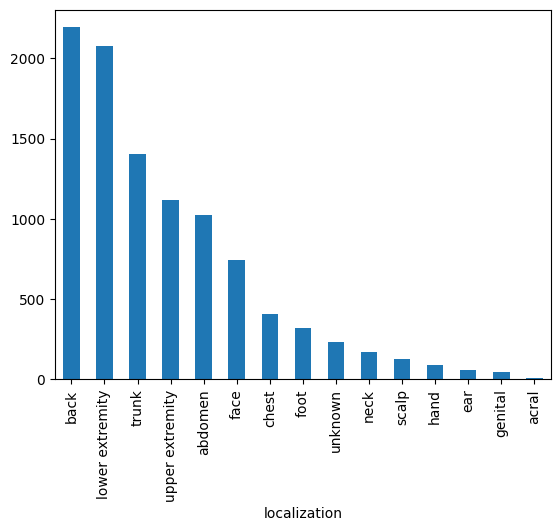

In [8]:
df['localization'].value_counts().plot(kind='bar')

<Axes: >

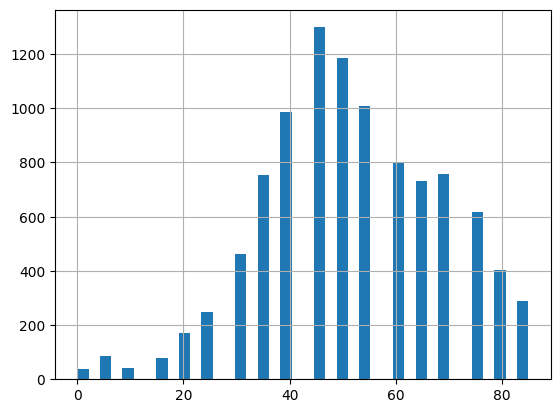

In [9]:
df['age'].hist(bins=40)

<Axes: xlabel='sex'>

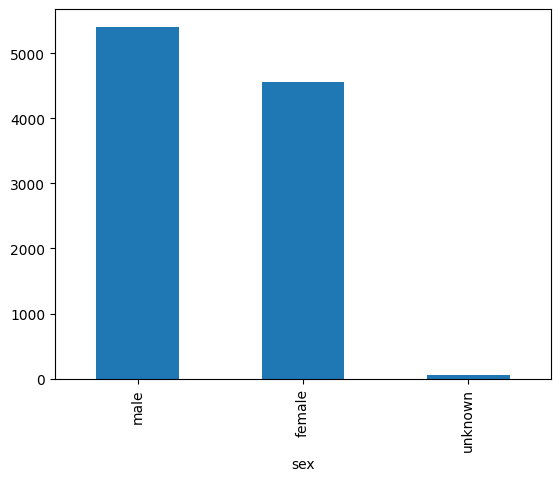

In [10]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='cell_type_idx'>

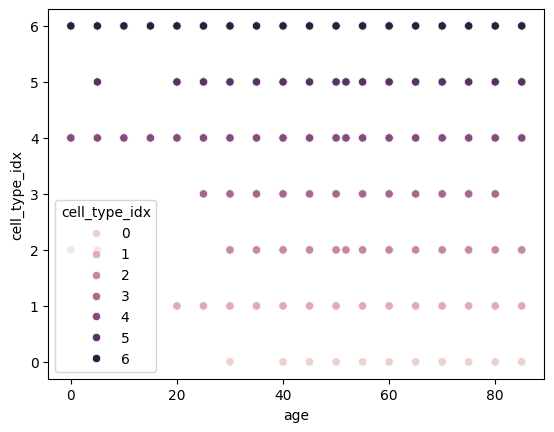

In [21]:
# visualize distribution of cancer types for each age group
sns.scatterplot(x='age',y='cell_type_idx',data=df, hue='cell_type_idx')

DATA CLEANING 

In [36]:
df.isnull().sum()
df['age'].fillna((df['age'].mean()), inplace=True)


/var/folders/ty/jl1vm4217zx6vktvp7bd66nm0000gn/T/ipykernel_62456/4229294920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna((df['age'].mean()), inplace=True)


In [37]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

TypeError: unhashable type: 'numpy.ndarray'

TRAIN TEST SPLIT

Train-Test Split + Data Augmentation

In [7]:
y = df["cell_type_idx"]
x = df["image"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.asarray(x_train.tolist())
x_test = np.asarray(x_test.tolist())

# mean_train = np.mean(x_train)
# std_train = np.std(x_train)
# x_train = (x_train - mean_train) / std_train
# mean_test = np.mean(x_test)
# std_test = np.std(x_test)
# x_test = (x_test - mean_test) / std_test

x_train = x_train/255.0
x_test = x_test/255.0


MODEL I: CNN

Boss has done:
- Added some scattered dropout layers in the CNN Sequential layers
- Varied batches (tried 64, 32, 16, 8, 4) best is prob 16/32 (the greater batch, the lower accuracy for both train and test, the lower batch, the higher train and test, but greater gap between the two, hence overfitting)
- Added data augmentation for minority classes
- Added accuracy for each mole type
- Added new model (identical to Model 0) with Per-Class accuracy, has to check its feasibility

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

img_height, img_width, channels = x_train.shape[1:]  # Extract image shape dynamically
batch_size = 16
num_classes = len(np.unique(y))  # Get number of unique classes

# Reconstruct training and testing dataframes from the earlier split using the correct image paths
train_df = pd.DataFrame({'path': df.loc[y_train.index, 'path'], 'cell_type_idx': y_train})
test_df = pd.DataFrame({'path': df.loc[y_test.index, 'path'], 'cell_type_idx': y_test})

# Create ImageDataGenerators for training and validation (testing) with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Ensure that the 'path' column contains strings
train_df['path'] = train_df['path'].astype(str)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='cell_type_idx',
    subset='training',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='raw'
)

test_df['path'] = test_df['path'].astype(str)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='cell_type_idx',
    subset='validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='raw'
)


# Data Augmentation

# Define the load and preprocess function first
def load_and_preprocess_image(path, target_size):
    # Read the image file
    image = tf.io.read_file(path)
    # Decode and convert to tensor
    image = tf.image.decode_jpeg(image, channels=3)
    # Resize to the target size
    image = tf.image.resize(image, target_size)
    # Optionally convert to float32
    image = tf.cast(image, tf.float32)
    return image

#Just one minority class

# # Suppose you want to augment images of a minority class
# minority_class = 'Melanoma'  # for example
# minority_df = df[df['cell_type'] == minority_class]

# # Get file paths for minority class images
# minority_paths = minority_df['path'].tolist()

# # Augment images from the minority class (example: generate 5 augmented images per original) -> Data Augmentation
# augmented_images = []
# for path in minority_paths:
#     img = load_and_preprocess_image(path, target_size=(img_height, img_width))  # using your tf-based function
#     img = tf.expand_dims(img, 0)  # add batch dimension
#     aug_iter = train_datagen.flow(img, batch_size=1)
#     for i in range(5):  # generate 5 variations
#         aug_img = next(aug_iter)[0]
#         augmented_images.append(aug_img)

#Many minority classes

# List of minority classes you want to augment
minority_classes = [
    'Dermatofibroma',
    'Vascular lesions',
    'Actinic keratoses',
    'Basal cell carcinoma',
    'Benign keratosis-like lesions',
    'Melanoma'
]

# Dictionary to store augmented images for each class
augmented_images = {}

# Generate augmented samples for each minority class
for minority_class in minority_classes:
    minority_df = df[df['cell_type'] == minority_class]
    minority_paths = minority_df['path'].tolist()
    images_aug = []  # List to hold augmented images for this class

    for path in minority_paths:
        # Load and preprocess the image using the defined function
        img = load_and_preprocess_image(path, target_size=(img_height, img_width))
        # Add a batch dimension
        img = tf.expand_dims(img, 0)
        # Create an augmentation iterator using your train_datagen
        aug_iter = train_datagen.flow(img, batch_size=1)
        for i in range(5):  # generate 5 variations per original image
            aug_img = next(aug_iter)[0]
            images_aug.append(aug_img)
    
    augmented_images[minority_class] = images_aug

# augmented_images now contains, for each minority class, a list of augmented images.


Found 6410 validated image filenames.
Found 400 validated image filenames.


In [51]:
# --------------------------------
# Model 0: Simple Custom CNN, Dave
# --------------------------------

img_height, img_width, channels = x_train.shape[1:]  # Extract image shape dynamically
num_classes = len(np.unique(y))  # Get number of unique classes

# model0 = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

model0 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)), 
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Simple CNN Summary:")
model0.summary()

early_stop0 = EarlyStopping(
    monitor='val_accuracy',  # Use validation accuracy for early stopping
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True
)

# Train the model (without generators)
history0 = model0.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=16,  # You can adjust batch size
    callbacks=[early_stop0]
)

c:\Users\giamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple CNN Summary:


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 73, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 34, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 15, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 7, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     1,147,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,241,159 (4.73 MB)

 Trainable params: 1,241,159 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.6564 - loss: 1.0560 - val_accuracy: 0.6675 - val_loss: 0.8966
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.6713 - loss: 0.8773 - val_accuracy: 0.6775 - val_loss: 0.9043
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.6993 - loss: 0.8291 - val_accuracy: 0.6700 - val_loss: 0.8351
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.7139 - loss: 0.7851 - val_accuracy: 0.6935 - val_loss: 0.8232
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.7202 - loss: 0.7467 - val_accuracy: 0.7089 - val_loss: 0.7533
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.7325 - loss: 0.7138 - val_accuracy: 0.7224 - val_loss: 0.7232
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.7430 - loss: 0.6894 - val_accuracy: 0.7219 - val_loss: 0.7654
Epoch 8/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.7396 - loss: 0.6731 -

In [54]:
# -------------------------------
# Model 0.0: CNN with accuracy based on each mole type
# -------------------------------

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# Custom Callback for Per-Class Accuracy
# -------------------------------
class PerClassAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, x_val, y_val, class_names):
        super(PerClassAccuracy, self).__init__()
        self.x_val = x_val
        self.y_val = y_val
        self.class_names = class_names

    def on_epoch_end(self, epoch, logs=None):
        # Get model predictions for the entire validation set
        preds = self.model.predict(self.x_val)
        pred_labels = np.argmax(preds, axis=1)
        true_labels = self.y_val
        
        print(f"\nPer-class accuracy for epoch {epoch+1}:")
        for i, cls in enumerate(self.class_names):
            # Create mask for samples of class i
            cls_mask = (true_labels == i)
            if np.sum(cls_mask) > 0:
                cls_acc = np.sum(pred_labels[cls_mask] == i) / np.sum(cls_mask)
                print(f"{cls}: {cls_acc:.3f}")
            else:
                print(f"{cls}: No samples in validation set")

# -------------------------------
# Prepare Data (Assumed to be defined earlier)
# -------------------------------
# x_train, y_train, x_test, y_test should be defined from your data split.
# For example, if using numpy arrays, they might have shapes:
# x_train.shape => (num_train_samples, img_height, img_width, channels)
# y_train.shape => (num_train_samples,)
# Adjust as necessary.

img_height, img_width, channels = x_train.shape[1:]  # Extract image shape dynamically
num_classes = len(np.unique(y_train))  # Number of unique classes

# Define class names (order should correspond to label indices)
class_names = [
    'Dermatofibroma',
    'Vascular lesions',
    'Actinic keratoses',
    'Basal cell carcinoma',
    'Benign keratosis-like lesions',
    'Melanoma',
    'Melanocytic nevi'
]

# -------------------------------
# Define the CNN Model with L2 Regularization (if desired)
# -------------------------------
model0 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Simple CNN Summary:")
model0.summary()

# -------------------------------
# Early Stopping and Custom Callback 
# -------------------------------
early_stop0 = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,              # Stop training when accuracy plateaus for 5 epochs
    restore_best_weights=True
)

per_class_callback = PerClassAccuracy(x_val=x_test, y_val=y_test, class_names=class_names)

# -------------------------------
# Train the Model
# -------------------------------
history0 = model0.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    batch_size=32,
    callbacks=[early_stop0, per_class_callback]
)

Simple CNN Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 73, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 34, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 15, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 7, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     1,147,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,241,159 (4.73 MB)

 Trainable params: 1,241,159 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step  p - a

Per-class accuracy for epoch 1:
Dermatofibroma: 0.000
Vascular lesions: 0.000
Actinic keratoses: 0.009
Basal cell carcinoma: 0.000
Benign keratosis-like lesions: 1.000
Melanoma: 0.000
Melanocytic nevi: 0.000
251/251 ━━━━━━━━━━━━━━━━━━━━ 44s 143ms/step - accuracy: 0.6492 - loss: 1.1498 - val_accuracy: 0.6690 - val_loss: 1.0941
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/steptep -

Per-class accuracy for epoch 2:
Dermatofibroma: 0.000
Vascular lesions: 0.032
Actinic keratoses: 0.026
Basal cell carcinoma: 0.000
Benign keratosis-like lesions: 0.987
Melanoma: 0.022
Melanocytic nevi: 0.000
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.6730 - loss: 0.9484 - val_accuracy: 0.6660 - val_loss: 0.9289
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/steptep - accur

Per-class accuracy for epoch 3:
Dermatofibroma: 0.058
Vascular lesions: 0.000
Actinic keratoses: 0.592
Basal cell carcinoma: 0.000
Benign keratosis-like lesions: 0.9

In [ ]:
# -------------------------------------------
# Model 2: Transfer Learning with MobileNetV2
# -------------------------------------------


base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the pre-trained layers

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("MobileNetV2-based Model Summary:")
model2.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stop2 = EarlyStopping(
    monitor='val_loss',
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True
)

history2 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stop2]
)

NameError: name 'tf' is not defined

In [52]:
# ---------------------------------------------------------------------------
# Model 2.1: Transfer Learning with Fine-Tuned MobileNetV2 unfreezing layers
# ---------------------------------------------------------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the pre-trained layers

model2_0 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model2_0.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
print("MobileNetV2-based Model Summary:")
model2_0.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stop2_0 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,          # Stop if no improvement for 5 epochs
    restore_best_weights=True
)

# Stage 1: Initial training with frozen base model
history2_0 = model2_0.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stop2_0]
)

# ----- Optional Fine-Tuning Stage -----
# Unfreeze the top layers of the base model for fine-tuning.
# Adjust the number of layers to unfreeze based on your needs.
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model2_0.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning training stage
history2_0_fine = model2_0.fit(
    train_generator,
    epochs=10,  # You can increase this number if necessary
    validation_data=test_generator,
    callbacks=[early_stop2_0]
)


MobileNetV2-based Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
 25/251 ━━━━━━━━━━━━━━━━━━━━ 1:43 458ms/step - accuracy: 0.5475 - loss: 1.4933

KeyboardInterrupt: 

In [55]:
# have to change the model name below depending on which model performs the best
model0.save('skin_cancer_model.keras')
